# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from scipy.stats import skew

In [3]:
import numpy as np

## Data Overview

- Observations
- Sanity checks

In [4]:
file_path = 'ExtraaLearn.csv'
df = pd.read_csv(file_path,delimiter=',',encoding='utf-8',header=0)

#Copying raw data
data = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [5]:
# Checking columns and associated datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# Quick checking values of the raw data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [7]:
# Check number of unique values for each column
unique_counts = data.nunique()
print(unique_counts)

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


## EDA

- It is a good idea to explore the data once again after manipulating it.

First I will analyze the categorical features

In [8]:
#Check number of categorical columns 

categorical_cols = list(data.select_dtypes("object").columns)
categorical_cols.remove('ID')
len(categorical_cols)


9

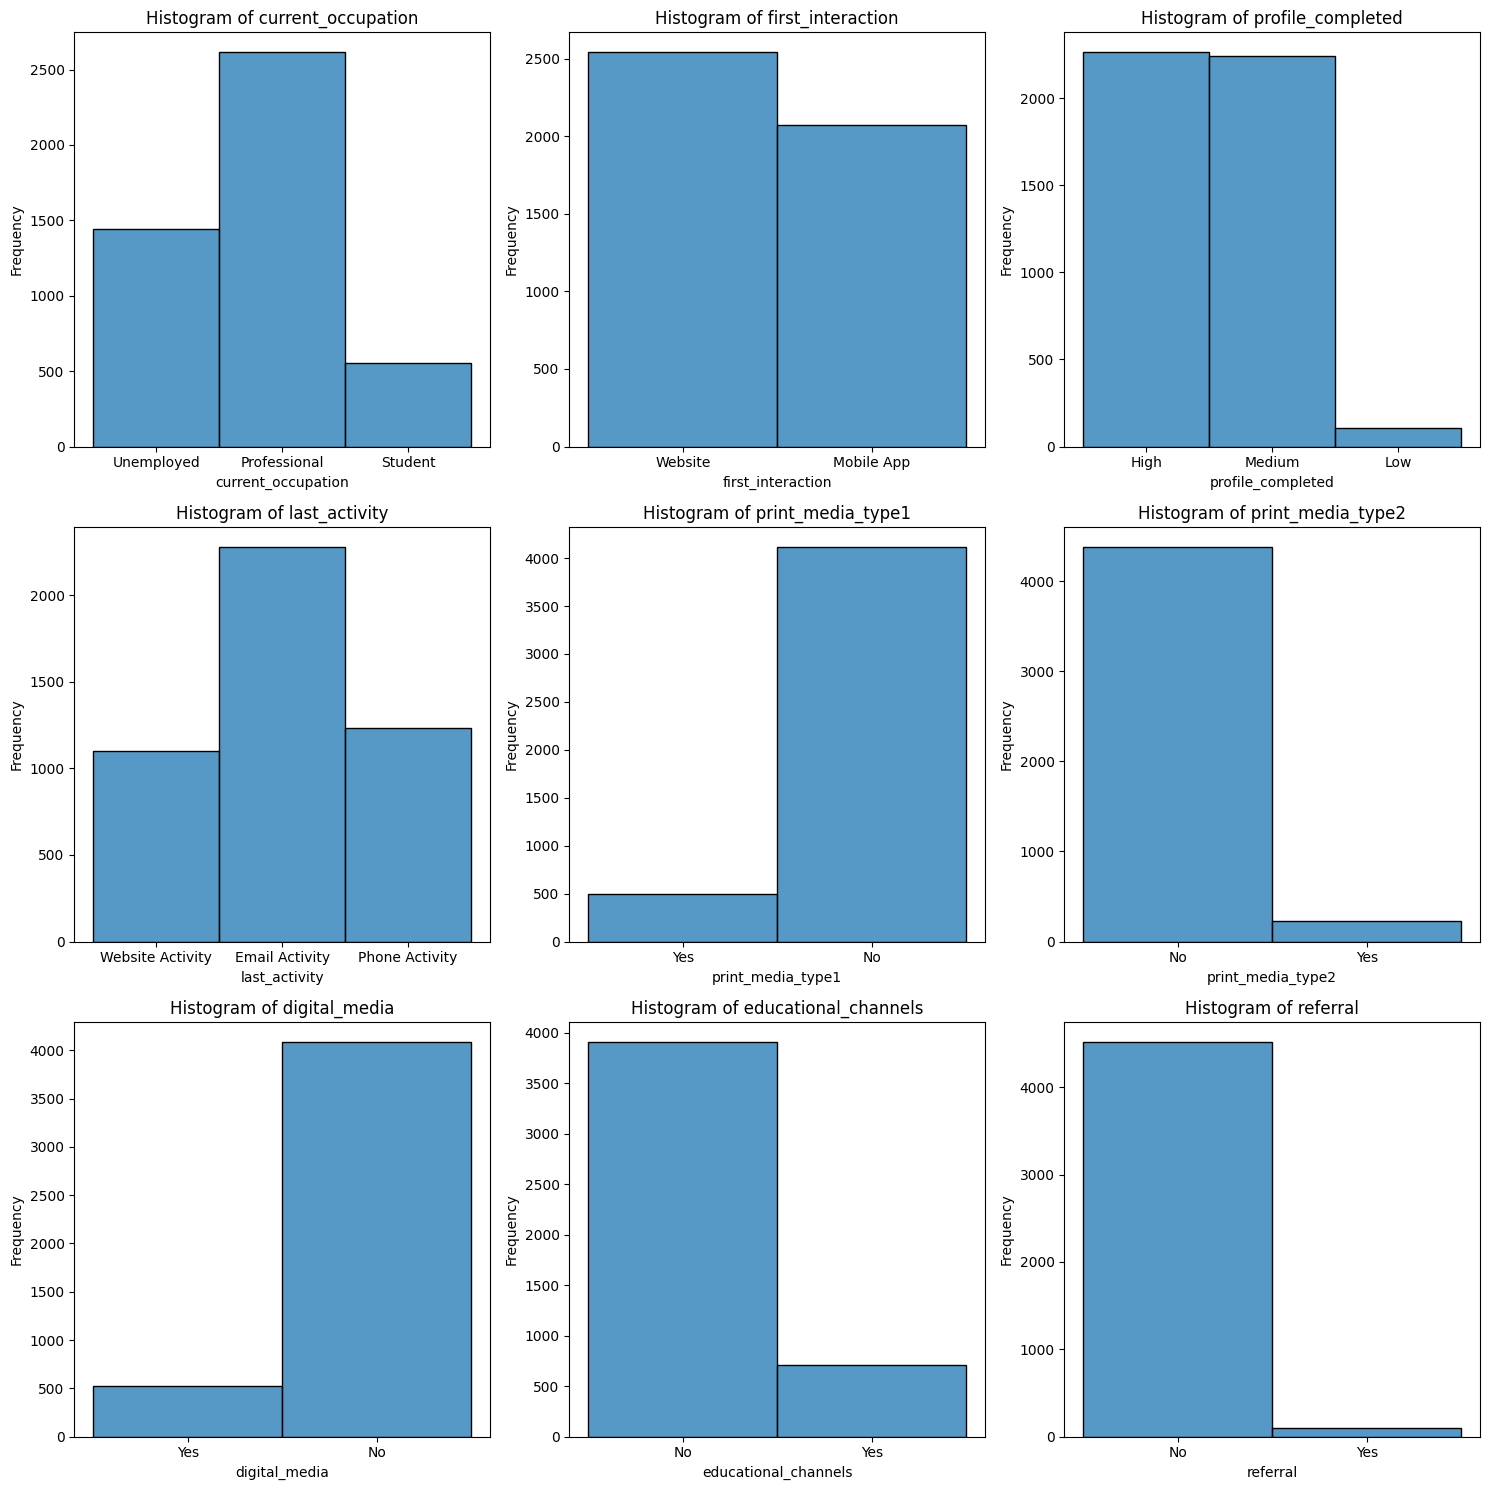

In [9]:
#Checking histogram of categorical features to check for any anomalies of potential interest

# Create subplots for the 3 by 3 grid using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the 3x3 array of subplots into a 1D array
axes = axes.flatten()

status_column = 'status'

i = 0
# Plot histograms for each column using Seaborn
for column in categorical_cols:
    sns.histplot(df[column], bins='auto', kde=False, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    i = i + 1

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

There is significant value count imbalance within categorical features, print_media_type1, print_media_type2, digital_media, educational_channels, and referral. I making an assumption that these features don't provide essential or informative information. Hence, I will remove these features.

It does appear that print media, educational channels, and digital media are not utilized by the users sampled

In [10]:
#Removing categorical features with significant data imbalance
columns_to_drop = ['print_media_type1','print_media_type2','digital_media','educational_channels','referral']

for col in columns_to_drop:
    del data[col]

In [11]:
#Checking remaining catogrical features
categorical_cols = list(data.select_dtypes("object").columns)
categorical_cols.remove('ID')
print(categorical_cols)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']


In [12]:
# Creating function to generate crosstab print outs to check relationships between categorical features and target variable
def crosstabFunc(data, predictor, target):
    tab_1 = pd.crosstab(data[predictor], data[target],normalize='index')
    tab_2 = pd.crosstab(data[predictor], data[target])
    result = pd.concat([tab_1,tab_2],axis=1)
    print(result)
    print("-" * 50)

In [13]:
# Print out crosstab results for the categorical features
for cat_cols in categorical_cols:
    crosstabFunc(data,cat_cols,"status")

status                     0         1     0    1
current_occupation                               
Professional        0.644878  0.355122  1687  929
Student             0.882883  0.117117   490   65
Unemployed          0.734212  0.265788  1058  383
--------------------------------------------------
status                    0         1     0     1
first_interaction                                
Mobile App         0.894686  0.105314  1852   218
Website            0.544060  0.455940  1383  1159
--------------------------------------------------
status                    0         1     0    1
profile_completed                               
High               0.582155  0.417845  1318  946
Low                0.925234  0.074766    99    8
Medium             0.811245  0.188755  1818  423
--------------------------------------------------
status                   0         1     0    1
last_activity                                  
Email Activity    0.696664  0.303336  1587  691
Phone Ac

Now I will analyze the numerical features

In [14]:
# Get the numerical columns
numerical_columns = list(data.select_dtypes(exclude='object').columns)
numerical_columns.remove('status')
print(numerical_columns)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']


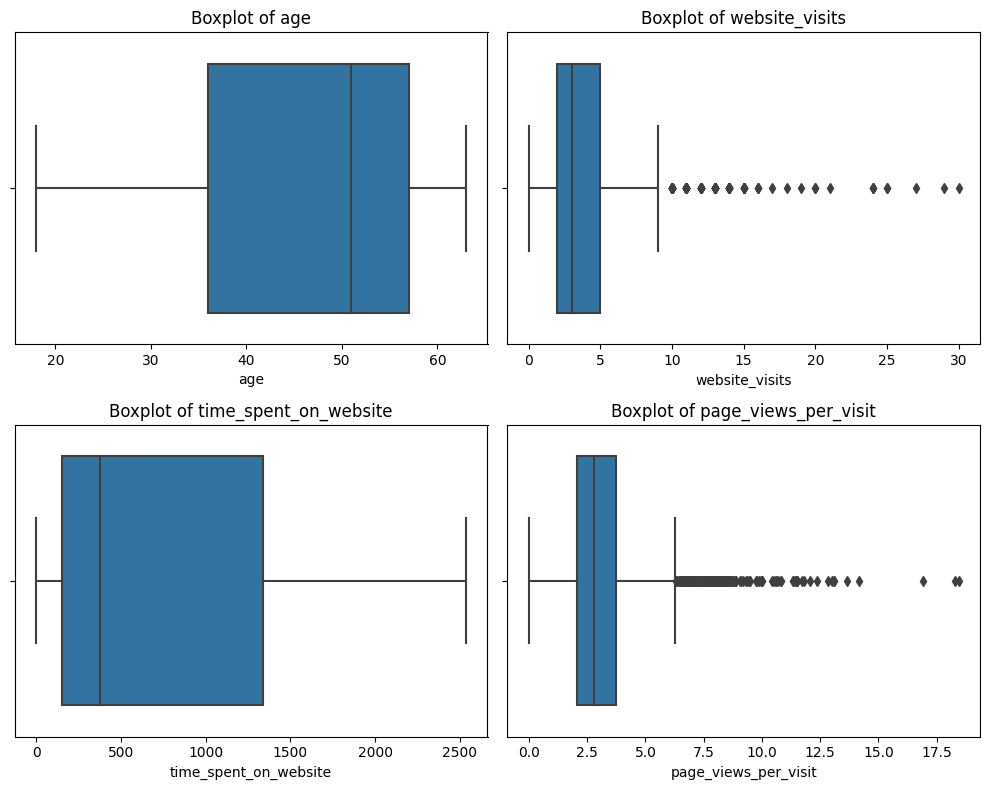

In [15]:
#Creating barplots for numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2x2 array of subplots into a 1D array
axes = axes.flatten()

i = 0
for column in numerical_columns:
    sns.boxplot(data=data, x=column,ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    i = i + 1

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

Both website_visits and page_views_per_visit have outliers

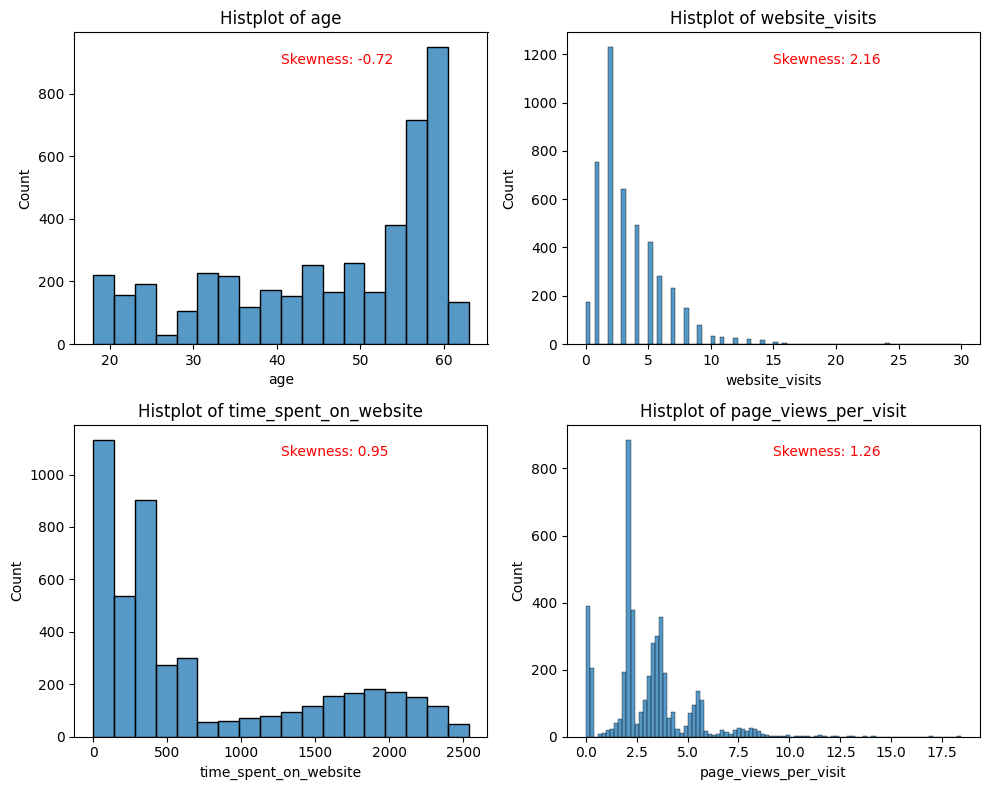

In [16]:
#Creating histograms to have better visualization of the numerical features

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2x2 array of subplots into a 1D array
axes = axes.flatten()

i = 0
for column in numerical_columns:
    sns.histplot(data=data, x=column,bins='auto',ax=axes[i])
    axes[i].set_title(f'Histplot of {column}')
    skewness = skew(data[column])
    axes[i].annotate(f'Skewness: {skewness:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=10, color='red')

    i = i + 1

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

Although high skew values for the numerical features maybe a genuine characteristic of the target population, it's still prudent to reduce skewness to avoid negative impact of outliers on machine learning models

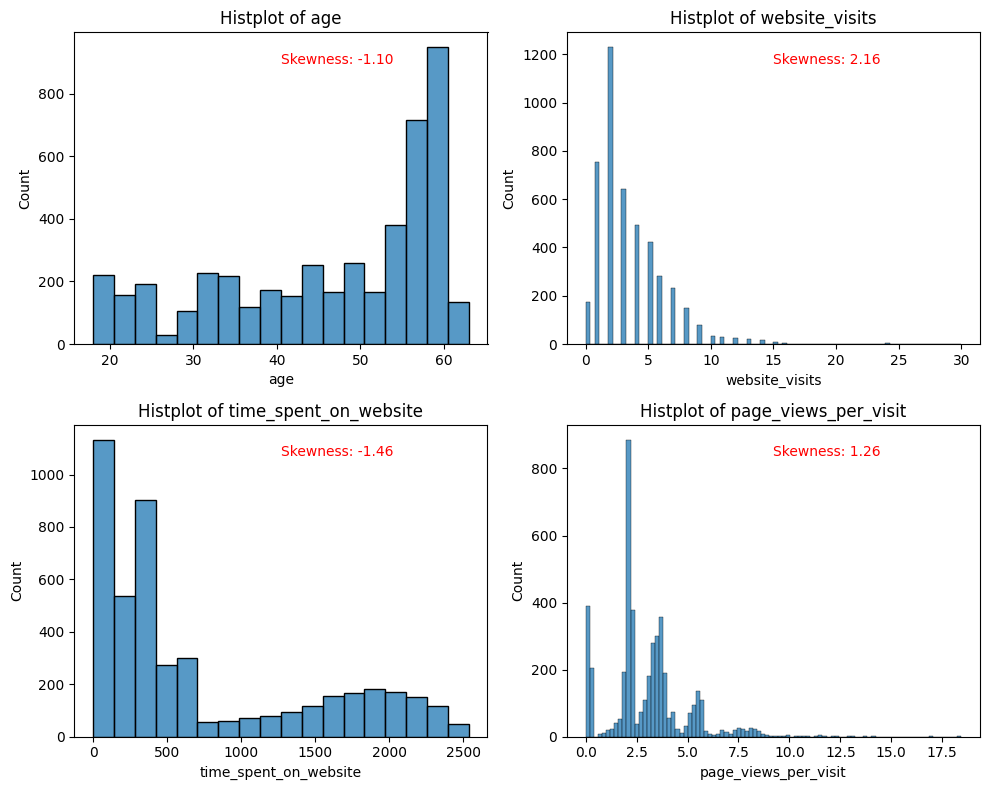

In [17]:
# Attempt reduce skewness of website_visits and page_views_per_visit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the 2x2 array of subplots into a 1D array
axes = axes.flatten()

i = 0
for column in numerical_columns:
    sns.histplot(data=data, x=column,bins='auto',ax=axes[i])
    axes[i].set_title(f'Histplot of {column}')
    # If skewness is greater than one, log transformation is applied
    if (skewness > 1) :
        data[column] = data[column].apply(np.log1p)
    skewness = skew(data[column])
    axes[i].annotate(f'Skewness: {skewness:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=10, color='red')

    i = i + 1

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

In [18]:
# Copying preprocessed_data to separate object
preprocessed_data = data.copy()
preprocessed_data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,status
0,EXT001,4.060443,Unemployed,Website,High,7,7.402452,1.861,Website Activity,1
1,EXT002,4.043051,Professional,Mobile App,Medium,2,4.430817,0.320,Website Activity,0
2,EXT003,3.970292,Professional,Website,Medium,3,5.802118,0.074,Website Activity,0
3,EXT004,3.988984,Unemployed,Website,High,4,6.142037,2.057,Website Activity,1
4,EXT005,3.178054,Student,Website,High,4,6.398595,16.914,Email Activity,0


## Building a Decision Tree model

In [19]:
# Importing necessary libraries for building decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn import preprocessing
import optuna
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
# Convert categorical features into numerical features

# Initialize Label Encoder
label_encoder = preprocessing.LabelEncoder()

# Dictionary to store original and encoded values
encoding_info = {}

# Getting categorical features
categorical_cols = list(preprocessed_data.select_dtypes("object").columns)
categorical_cols.remove('ID')

for col in categorical_cols:
    preprocessed_data[col] = label_encoder.fit_transform(preprocessed_data[col])
    # Store original and encoded values in the dictionary
    encoding_info[col] = {
        'original_values': label_encoder.classes_,
        'encoded_values': list(range(len(label_encoder.classes_)))
    }

In [21]:
# Function to display the original and encoded values for each column
def getOriginalValues():
    for col, values in encoding_info.items():
        print(f"\nColumn: {col}")
        print(f"Original Values: {values['original_values']}")
        print(f"Encoded Values: {values['encoded_values']}")

In [22]:
X = preprocessed_data.drop(columns=['ID','status'],axis=1)
y = preprocessed_data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Creating function to output performance metrics of the decision tree model
def model_eval(actual,predicted):
    print("Accuracy:", accuracy_score(actual, predicted))
    print("\nClassification Report:\n", classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (5, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')    
    plt.xlabel('Predicted')
    plt.show()

First I will create a non hyperparameter tuned decision tree model, as a base case comparsion for future hypertuned models

In [24]:
# Initialize and fit decision tree model to the training data, with zero hyperparameter tuning
d_tree_model = DecisionTreeClassifier()
d_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy: 0.8212351029252438

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       649
           1       0.71      0.68      0.69       274

    accuracy                           0.82       923
   macro avg       0.79      0.78      0.78       923
weighted avg       0.82      0.82      0.82       923



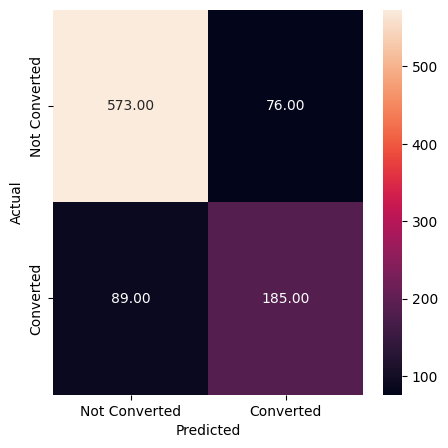

In [25]:
# Make predictions of the test data
y_pred = d_tree_model.predict(X_test)

# Check performance of model on testing data
model_eval(y_test,y_pred)

Accuracy: The accuracy of model is approximately 81.47%. This means that the model correctly predicted the both class labels for about 81.47% of the instances.

Class 0 is not converted, while class 1 is converted
Precision, Recall, and F1-Score:
- For class 0: The precision is 0.86, meaning that when the model predicts class 0, it's correct 86% of the time. The recall is 0.88, indicating that the model correctly identifies 88% of the actual instances of class 0. The F1-score, which balances 
precision and recall, is 0.87.

- For class 1: The precision is 0.71, indicating that when the model predicts class 1, it's correct 70% of the time. The recall is 0.66, meaning that the model captures 67% of the actual instances of class 1. The F1-score for class 1 is 0.68.

Support: Support refers to the number of actual occurrences of each class in the specified dataset. For class 0, there are 649 instances, and for class 1, there are 274 instances.

Confusion Matrix:
True Positive (TP): 573 instances of class 0 were correctly predicted.
False Positive (FP): 76 instances were incorrectly predicted as class 0.
True Negative (TN): 182 instances of class 1 were correctly predicted.
False Negative (FN): 92 instances were incorrectly predicted as class 1.

Summary:
- The model appears to have higher accuracy and precision for predicting not converted members as opposed to converted ones. 

Next Steps:
- I will focus on improving recall score, since false negatives are loss of potential customers

In [26]:
value_cnt = preprocessed_data['status'].value_counts()
print(value_cnt)

status
0    3235
1    1377
Name: count, dtype: int64


In [27]:
# I noticed prior there where signficiantly more data available for non-converted members (status:0). 
# As such I need to modify the class weights

#Check count ratio of status 0 and 1
value_cnt = preprocessed_data['status'].value_counts()
ratio_cnt_val = value_cnt[0] / (value_cnt[0] + value_cnt[1])
print("status 0: ", ratio_cnt_val)
print("status 1: ", 1- ratio_cnt_val)

status 0:  0.7014310494362532
status 1:  0.29856895056374677


I will be using Optuna python library for automatic hyperparameter tuning. 
Optuna utilizes a bayesian optimization, which builds a probabilisitc model to approximate the objective function base on the evaluations conducted thus far
Then the model is used to determine where to sample the objective function next, in order to maximize or minimize the objective function

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 0.1324889236772932, 'min_samples_leaf': 12}
Accuracy: 0.8299024918743229

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       649
           1       0.70      0.76      0.73       274

    accuracy                           0.83       923
   macro avg       0.79      0.81      0.80       923
weighted avg       0.84      0.83      0.83       923



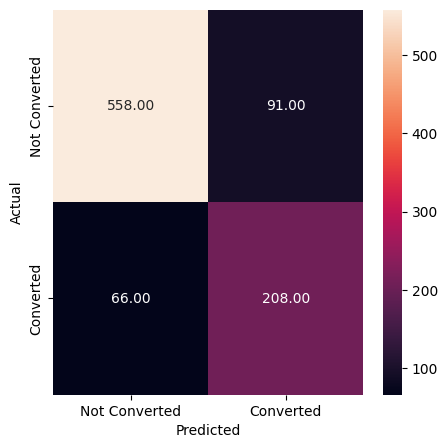

In [28]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 25),
        'class_weight': {0: 0.3, 1: 0.7},  # My specified class weights to accomodate the class imbalance
        'random_state' : 42,
    }

    # Create and train the decision tree model
    model = DecisionTreeClassifier(**params)
    # The objective function will be the mean cross valdiation score, where recall_score will be used as the metric to evaluated
    # Note cross validation is utilized, to reduce model overfitting on training data
    recall_scorer = make_scorer(recall_score, average='weighted')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=recall_scorer)
    mean_recall = scores.mean()

    return mean_recall

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_trial.params
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
model_eval(y_test,y_pred)

Accuracy: ~2% improvement

Recall score:-2% improvement for class 0 and 10% improvement for class 1
- Since our initial objective of hypertuning was to improve recall score for class 1, a 10% improvement is a good sign

Confusion Matrix
- There was also a decrease of 26 counts of false negatives and increase of true positive counts

F1 score has also improved, indicating the was able to improve recall score, while maintaining previously achieved balance between precision and recall

Summary:
- The tuned model appears to have improved recall score for class 1 and decrease the number of false negatives thereby satifying the original objective

In [29]:
# Getting the original values of the encoded categorical columns for ease of interpretation 
getOriginalValues()


Column: current_occupation
Original Values: ['Professional' 'Student' 'Unemployed']
Encoded Values: [0, 1, 2]

Column: first_interaction
Original Values: ['Mobile App' 'Website']
Encoded Values: [0, 1]

Column: profile_completed
Original Values: ['High' 'Low' 'Medium']
Encoded Values: [0, 1, 2]

Column: last_activity
Original Values: ['Email Activity' 'Phone Activity' 'Website Activity']
Encoded Values: [0, 1, 2]


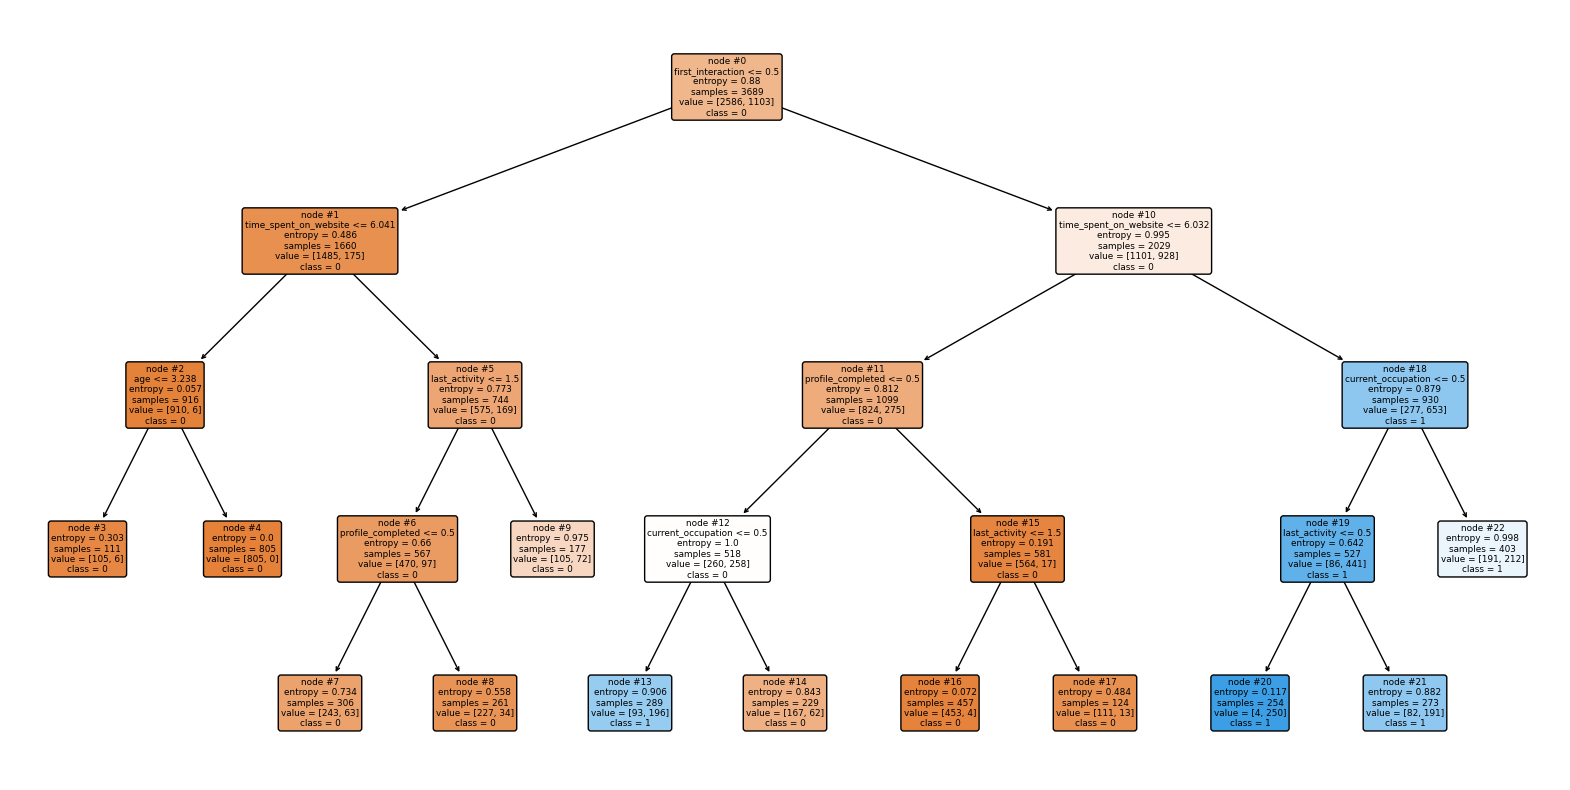

In [30]:
# Visualize the Decision tree

features = list(X.columns)

#tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.figure(figsize=(20, 10))
tree.plot_tree(best_dt_model, filled=True, feature_names=features, class_names=['0','1'], rounded=True,node_ids = True)
plt.show()

Observations:
- It appears that individuals whose first interaction is mobile app, has zero conversions
- For individuals whose first interaction is website and has spent more than 6 hours on website, the conversion rate is extremely high
    - Conversion is also likely for those who spent less than 6 hours, if the profiles are highly completed and they are currently employeed 

In [31]:
# To verify my observations, I will find each feature importance (aka, how often a feature is used to split the data across the decision tree)
print (pd.DataFrame(best_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
time_spent_on_website  0.337073
first_interaction      0.290787
profile_completed      0.184454
current_occupation     0.096431
last_activity          0.078508
age                    0.012747
website_visits         0.000000
page_views_per_visit   0.000000


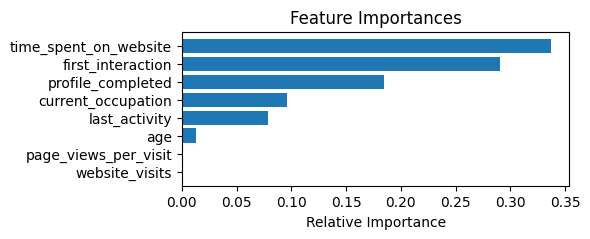

In [32]:
# Plotting the feature importance
importances = best_dt_model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (5, 2))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The data above seems to validate my previous observations

## Building a Random Forest model

In [42]:
# Importing any additional libraries to construct random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

Accuracy: 0.8656554712892741

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       649
           1       0.82      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.87      0.86       923



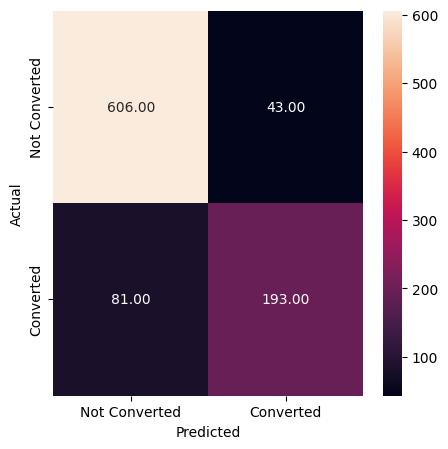

In [35]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

model_eval(y_test,y_pred)


Accuracy: This model appears to have higher accuracy compared to both vanilla and hypertuned decision trees

Recall Score: Similar to the vanilla decision tree the recall score for class 0 is higher than class 1

Confusion Matrix: Both TP and TN counts for random forest model is higher than vanilla decision tree model. Compared with hypertuned deicsion tree, the random forest model identified less TP.

Summary: 
- It appears the vanilla random forest model yields better results due to its ability to have better generalization and high accuracy.
- However, the imbalance of data available between class 1 and 0 may still be contributing the 23% difference between class 0 and 1 recall score.

Next Steps:
- I will attempt to hypertune the random forest model in hopes of yielding a more balanced recall score

Best Hyperparameters: {'criterion': 'gini', 'n_estimators': 133, 'max_depth': 8, 'min_samples_split': 0.13938255301881705, 'min_samples_leaf': 23}
Accuracy: 0.8201516793066089

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88       649
           1       0.89      0.45      0.60       274

    accuracy                           0.82       923
   macro avg       0.85      0.71      0.74       923
weighted avg       0.83      0.82      0.80       923



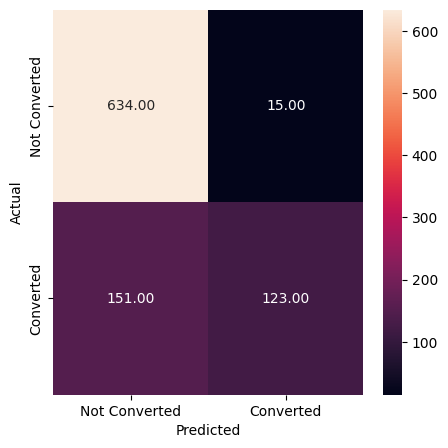

In [44]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1.0),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 30),
        'class_weight': {0: 0.3, 1: 0.7},  # My specified class weights to accomodate the class imbalance
        'random_state': 42,
    }

    # Create and train the Random Forest model
    model = RandomForestClassifier(**params)
    
    # Use stratified k-fold cross-validation with recall score as the metric to be maximized
    recall_scorer = make_scorer(recall_score, average='weighted')
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=recall_scorer)
    mean_recall = scores.mean()

    return mean_recall

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

model_eval(y_test, y_pred)

The difference between recall score for class 0 and 1 seems to have widened. Since, I've arleady adjusted the class weights, I will now lower threshold for class 1 to increase sensitivity

Accuracy: 0.8342361863488624

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       649
           1       0.69      0.81      0.74       274

    accuracy                           0.83       923
   macro avg       0.80      0.83      0.81       923
weighted avg       0.85      0.83      0.84       923



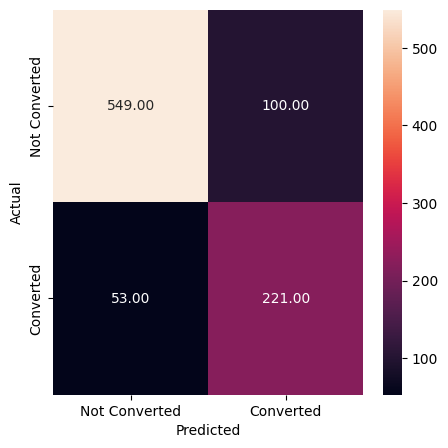

In [52]:
# Getting probability for class 1 from the hypertuned random forest model
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Adjust the threshold
threshold = 0.35
y_pred_adjusted = (y_probs > threshold).astype(int)

model_eval(y_test, y_pred_adjusted)

Recall Score: The hypertuned random forest model with adjusted threshold, now has the best recall ratio as compared to all other developed models

Confusion Matrix: The counts of TP and TN have not signficantly changed. The number of FN have decreased by ~35%. This is great, since we want to minimize loss of potential customers 

In [54]:
# To verify my observations, I will find each feature importance (aka, how often a feature is used to split the data across the decision tree)
print (pd.DataFrame(best_rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
first_interaction      0.368022
time_spent_on_website  0.316516
profile_completed      0.183794
current_occupation     0.052405
age                    0.037215
last_activity          0.029071
page_views_per_visit   0.010395
website_visits         0.002582


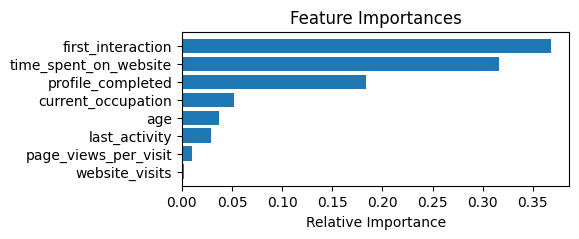

In [55]:
# Plotting the feature importance
importances = best_rf_model.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (5, 2))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices])

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Compared with the decision tree model, random forest model have the same important features, although the order of feature importance is not the same. As such, this provides additional evidence that that these features should be of focus.

## Actionable Insights and Recommendations

In general, the models have above suggest individuals whose first interaction is on webiste and have spent more at least 6 ours on website tend to have the highest probability of being converted.

As such, I am recommending reduce focus on mobile app and increase focus on the website to enhance user engagement and interest. Given we don't know exactly which parts of the website the user may like or dislike. I would focus efforts to design and run studies to obtain that information.